In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

In [35]:
df=pd.read_csv("/content/SMS_train (1).csv",encoding="ISO-8859-1")
df1=pd.read_csv("/content/SMS_test (2).csv",encoding="ISO-8859-1")

In [36]:
df_full=pd.concat([df,df1])
df_full

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [37]:
df_full.iloc[1081]

S. No.                                                        125
Message_body    Great. Have a safe trip. Dont panic surrender ...
Label                                                    Non-Spam
Name: 124, dtype: object

In [17]:
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [18]:
df1

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [19]:
df_full.shape

(1082, 3)

In [39]:
# df_full.reset_index(drop=True,inplace=True)
df_full.reset_index(inplace=True)
df_full


,level_0,index,S. No.,Message_body,Label
0,0,0,1,Rofl. Its true to its name,Non-Spam
1,1,1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,2,2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,3,3,4,Will ü b going to esplanade fr home?,Non-Spam
4,4,4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...,...,...
1077,1077,120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,1078,121,122,Try to do something dear. You read something f...,Non-Spam
1079,1079,122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,1080,123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [23]:
df_full

,index,S. No.,Message_body,Label
0,0,1,Rofl. Its true to its name,Non-Spam
1,1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,3,4,Will ü b going to esplanade fr home?,Non-Spam
4,4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...,...
1077,120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,121,122,Try to do something dear. You read something f...,Non-Spam
1079,122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [24]:
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [25]:
  df1

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [26]:
df_full.Label.value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

In [27]:
df_full.head()

,index,S. No.,Message_body,Label
0,0,1,Rofl. Its true to its name,Non-Spam
1,1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,3,4,Will ü b going to esplanade fr home?,Non-Spam
4,4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [28]:
df_full.tail()

,index,S. No.,Message_body,Label
1077,120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,121,122,Try to do something dear. You read something f...,Non-Spam
1079,122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
1081,124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [29]:
df_full.dtypes

index            int64
S. No.           int64
Message_body    object
Label           object
dtype: object

In [30]:
df_full.describe()

,index,S. No.
count,1082.000000,1082.000000
mean,429.940850,430.940850
std,292.259931,292.259931
min,0.000000,1.000000
25%,145.250000,146.250000
50%,415.500000,416.500000
75%,685.750000,686.750000
max,956.000000,957.000000


<Axes: xlabel='Label', ylabel='count'>

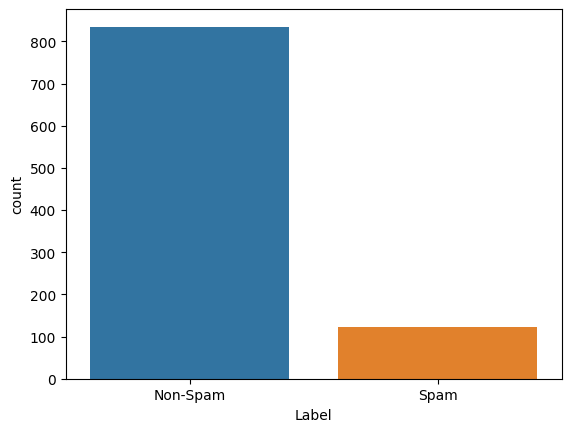

In [31]:
sns.countplot(x="Label",data=df)

In [32]:
df_full.isna().sum()

index           0
S. No.          0
Message_body    0
Label           0
dtype: int64

In [33]:
df_full.columns

Index(['index', 'S. No.', 'Message_body', 'Label'], dtype='object')

In [40]:
df_full.drop(["S. No.","level_0","index"],inplace=True,axis=1)
df_full

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [41]:
df_full["Label"]=df_full["Label"].apply(lambda x: 1 if x=="Spam"  else 0 )
df_full

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1078,Try to do something dear. You read something f...,0
1079,Sun ah... Thk mayb can if dun have anythin on....,0
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",0


In [42]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [43]:
messages=df_full.Message_body
messages

0                              Rofl. Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity, * was in mood for that. So...any other s...
3                    Will ü b going to esplanade fr home?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear. You read something f...
1079    Sun ah... Thk mayb can if dun have anythin on....
1080    SYMPTOMS when U are in love: "1.U like listeni...
1081    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [44]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
messages=messages.apply(lambda x: tk.tokenize(x)).apply(lambda x: " ".join(x))
messages

0                             Rofl . Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity , * was in mood for that . So ... any oth...
3                   Will ü b going to esplanade fr home ?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear . You read something ...
1079    Sun ah ... Thk mayb can if dun have anythin on...
1080    SYMPTOMS when U are in love : " 1 . U like lis...
1081    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

In [45]:
messages=messages.str.replace("[^a-zA-Z0-9]+"," ")
messages

<ipython-input-45-1b1690560253>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  messages=messages.str.replace("[^a-zA-Z0-9]+"," ")


0                               Rofl Its true to its name
1       The guy did some bitching but I acted like i d...
2       Pity was in mood for that So any other suggest...
3                      Will b going to esplanade fr home 
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear You read something fo...
1079    Sun ah Thk mayb can if dun have anythin on Thk...
1080    SYMPTOMS when U are in love 1 U like listening...
1081     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [46]:
from nltk.tokenize import word_tokenize
messages=messages.apply(lambda x:" ".join([w for w in word_tokenize(x) if len(w)>=3]) )
messages

0                                  Rofl Its true its name
1       The guy did some bitching but acted like inter...
2            Pity was mood for that any other suggestions
3                               Will going esplanade home
4       This the 2nd time have tried contact have won ...
                              ...                        
1077    wonders WORLD 7th You 6th style 5th smile 4th ...
1078      Try something dear You read something for exams
1079    Sun Thk mayb can dun have anythin Thk have boo...
1080    SYMPTOMS when are love like listening songs ge...
1081        Great Have safe trip Dont panic surrender all
Name: Message_body, Length: 1082, dtype: object

In [47]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("english")
messages=messages.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x) ]).apply(lambda x:" ".join(x))
# tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
messages

0                                    rofl it true it name
1       the guy did some bitch but act like interest b...
2                piti was mood for that ani other suggest
3                                   will go esplanad home
4       this the 2nd time have tri contact have won th...
                              ...                        
1077    wonder world 7th you 6th style 5th smile 4th p...
1078             tri someth dear you read someth for exam
1079    sun thk mayb can dun have anythin thk have boo...
1080    symptom when are love like listen song get sto...
1081          great have safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [48]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop=stopwords.words("english")
messages=messages.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
# tweets=tweets.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
messages


0                                          rofl true name
1       guy bitch act like interest buy someth els nex...
2                                   piti mood ani suggest
3                                        go esplanad home
4       2nd time tri contact 750 pound prize claim eas...
                              ...                        
1077    wonder world 7th 6th style 5th smile 4th perso...
1078                     tri someth dear read someth exam
1079    sun thk mayb dun anythin thk book lesson pilat...
1080    symptom love like listen song get stop see nam...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(messages)
data

<1082x2853 sparse matrix of type '<class 'numpy.float64'>'
	with 8924 stored elements in Compressed Sparse Row format>

In [58]:
X=data.toarray()

In [59]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
y=df_full.Label.values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [64]:
knn=KNeighborsClassifier(n_neighbors=9)
nb=GaussianNB()
sv=SVC()
lst_models=[knn,nb,sv]

In [65]:
from sklearn.metrics import classification_report
for i in lst_models:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(" ")
  print(i)
  print(classification_report(y_test,y_pred))
  print(" ")


 
KNeighborsClassifier(n_neighbors=9)
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       294
           1       0.83      0.55      0.66        64

    accuracy                           0.90       358
   macro avg       0.87      0.76      0.80       358
weighted avg       0.89      0.90      0.89       358

 
 
GaussianNB()
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       294
           1       0.63      0.89      0.74        64

    accuracy                           0.89       358
   macro avg       0.80      0.89      0.83       358
weighted avg       0.91      0.89      0.90       358

 
 
SVC()
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       294
           1       0.97      0.55      0.70        64

    accuracy                           0.92       358
   macro avg       0.94      0.77      0.83       358
weighted 